**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Linear Discriminant Analysis & Logistic Regression for genre classification

## Abstract

In this report, we will analyze how different machine learning methods can have varying results for the problem of determining a genre of a song, based on three main features, namely the songs' timbre, chroma and rythm. We will also determine other factors that can have any influence (whether positive or negative) on the overall accuracy.

## 1. Introduction

The problem of determining the genre of any given song is an interesting challenge, and could be a valuable and time-saving technology for a number of different services and platforms in the music industry. It is easy to imagine a lot possible applications, including e.g. recommendation systems, automatic personalised radios, discovering new music in streaming services, and many more. 

At the base, this is a classification problem, similar to determining the depicted objects from an image, detecting whether or not an email is spam, determining a patients disease based on their symptoms, and many more. This is a well documented problem, for which there are already a lot of papers around, analyzing the efficiency and performance of different machine learning algorithms.

By analysing those different algorithms ourselves, we hope to get hands on experience with a concrete machine learning use case. In addition, we will be getting a feel for what each algorithm does, and despite the fact that some ways to tackle this problem are not at all useful, we will however get at least some idea of in what cases they will be more efficient.

In this report, we will start by analyzing the given data, maybe already try to detect any anomalies and try to determine what data will be the most important to getting a good result. We will then move on to trying out different machine learning algorithms, and vizualising both results and performance of the mehtods. In a final section, we will try to analyze the results of these algorithms, and select the most fitting machine learning principles for this specific problem, based on these results.

## 2. Data analysis

We were given two large datasets, each one containing a list of songs, themselves represented by a list of in total 264 features. With the 'training set', containing 4363 songs, a label list was also included, specifying one out of ten possible genres for each song. For the 'test set', containing 6544 songs, we were not provided with these labels, and determining a label for these songs proved to be an objective measuring tool for analyising the accuracy for any methods used throughout our experiments.


### 2.1 Class Distribution
In the next cell, we will provide a relative histogram showing how many songs belong to each genre. 
We can see a huge difference between the amount of songs in genre one, compared to the other genres. We also determined, by analyzing the dummy solution used for the Kaggle competition, which has an accuracy of 50%, that the class distribution of the test data is very similar or equal to that of the training data.

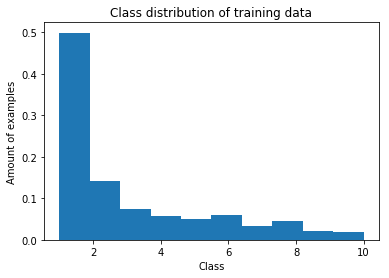

In [9]:
## To rerun this cell, or any cell that contains code, it is important to run the appropriate cells in the appendices. 
## The necessary cells from the appendices will be stated in each cell.

## APP CELLS: {1,3}
plotClassDistributionHistogram(Y)

### 2.2 Anomaly Detection

In the next cells, we plotted some interesting graphs that came from plotting the average of every feature, sorted per genre.

We can clearly see that the data in 'MFCC mean' is distorted. The first four tracks of this feature show an average of $10^6$ for each genre. This is not at in line with what you would expect from the mean MFCC of other tracks. This anomaly in the data can happen sometimes, and the distorted data should not be taken into account when training the dataset

One other thing we noticed is that there is some redundant data in the set as well. The 'Chroma max' specifically, a value that can range from 0 to 1 for any single track, is almost always 1 for each song across all tracks. This feature is thus completely redundant and could also be removed in the training algorithms, altough we expect that only performance will improve, but accuracy won't be affected.

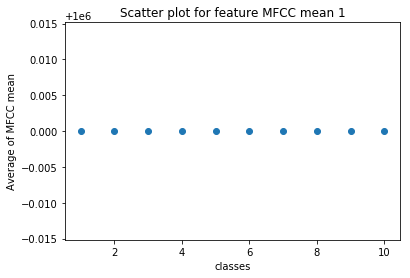

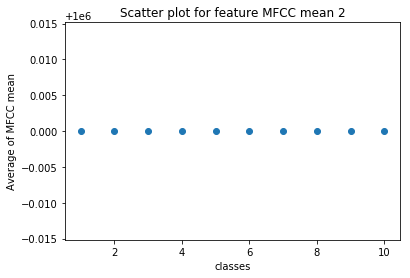

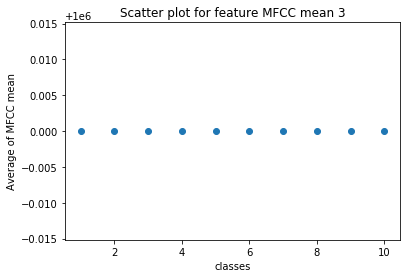

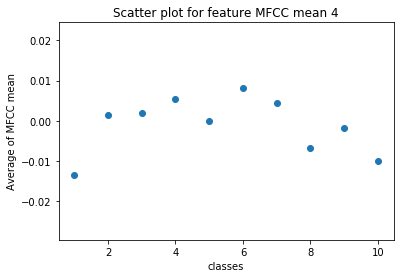

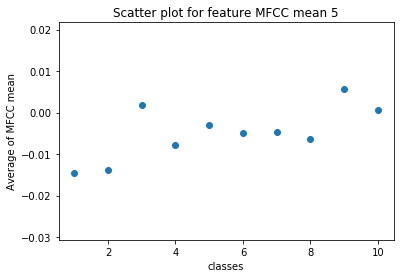

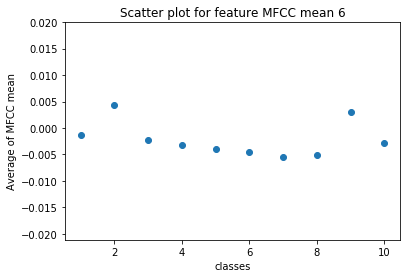

In [38]:
## APP CELLS: {1,2,4}
badValueProps = {'MFCC'  : ['mean']}
tracks = [1,2,3,4,5,6]
plotSpecifiedValuesFromTracks(X,Y,badValueProps,normalized=False, tracks=tracks)

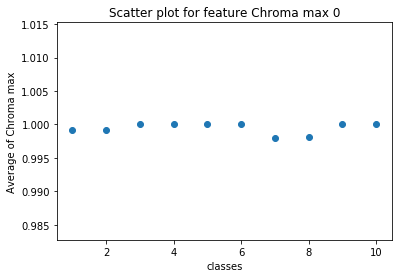

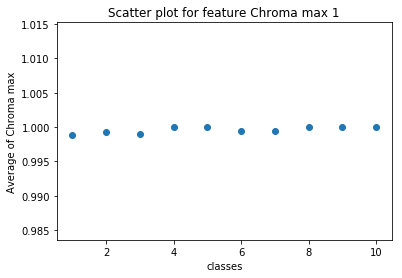

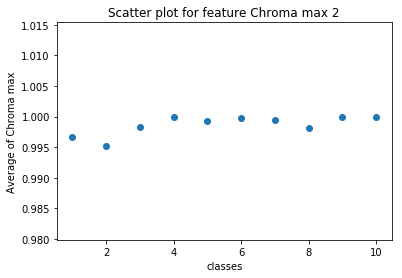

In [37]:
## APP CELLS: {1,2,4}
redundantValueProps = {'Chroma': ['max']}
tracks = [0,1,2]
plotSpecifiedValuesPerTrack(X,Y,redundantValueProps,normalized=False,tracks=tracks)

### 2.3 Feature dimension analysis

As mentioned before, each song has 264 features. We were already able to detect some anomalies in these features. In addition, we can look at what these features mean to learn more about them, and analyze if such a high number of features per song is really necessary.

The features provided are a summary representation of the 3 main components of music: timbre, pitch (melody and harmony) and rhythm.

-  The Rhythm refers to different temporal structures in music. The existence of rhythm is based on natural repetitions in time, such as walking, running, the heartbeat, and breathing.
-  The Timbre, or tonal colour of a sing, is a multidimensional psychoacoustic measure. When two sounds have the same pitch, loudness, and duration, timbre is what makes one particular musical sound different from another. The best physical explanation for this difference comes from the spectrum and its variation with time.
-  The Pitch is defined by the American National Standards Institute as ‘that auditory attribute of sound according to which sounds can be ordered on a scale from low to high’.

These three components are respectively quantified by the following properties, which together form a feature vector for each song:
-  Rhythm Pattern:
    -  24 bands
    -  7 statistics:
        -  mean
        -  median
        -  variance
        -  kurtosis
        -  skewness
        -  min
        -  max
-  Mel Frequency Cepstral Coefficients (MFCCs):
    -  12 coefficients
    -  4 properties:
        -  mean
        -  standard deviation
        -  min
        -  max
-  Chroma Features:
    -  12 pitch classes
    -  4 properties:
        -  mean
        -  standard deviation
        -  min
        -  max


We can see that there will be a high correlation between some of this data. For example, the mean and median of the Rythm will be highly correlated to each other. Taking this into account, there will probably be possibilities to improve efficiency by reducing the dimension of the feature matrix.

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*




## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



## Logistic regression

In [ ]:
## APP CELLS: {1,5,6,7}
logisticRegressionWithoutLDA(X_y_space)

When applying lbfgs on 14 Features without any changes, the accuracy on the training data is 0.5601374570446735
When applying newton-cg on 14 Features without any changes, the accuracy on the training data is 0.5979381443298969
When applying sag on 14 Features without any changes, the accuracy on the training data is 0.5807560137457045
When applying saga on 14 Features without any changes, the accuracy on the training data is 0.56815578465063
When applying lbfgs on 11 Features with smote, the accuracy on the training data is 0.3745704467353952
When applying newton-cg on 11 Features with smote, the accuracy on the training data is 0.41580756013745707
When applying sag on 11 Features with smote, the accuracy on the training data is 0.4146620847651776
When applying saga on 11 Features with smote, the accuracy on the training data is 0.4066437571592211
When applying lbfgs on 14 Features oversampled, the accuracy on the training data is 0.5218884120171674
When applying newton-cg on 14 Featu

In [31]:
## APP CELLS: {1,5,6,8}
logisticRegressionWithLDA(X_y_space)

When applying lbfgs on 14 Features with LDA, the accuracy on the training data is 0.7422680412371134
When applying newton-cg on 14 Features with LDA, the accuracy on the training data is 0.7422680412371134
When applying sag on 14 Features with LDA, the accuracy on the training data is 0.7422680412371134
When applying saga on 14 Features with LDA, the accuracy on the training data is 0.7422680412371134
When applying lbfgs on 11 Features with LDA, the accuracy on the training data is 0.7124856815578465
When applying newton-cg on 11 Features with LDA, the accuracy on the training data is 0.7124856815578465
When applying sag on 11 Features with LDA, the accuracy on the training data is 0.7124856815578465
When applying saga on 11 Features with LDA, the accuracy on the training data is 0.7124856815578465


## SGD Classifier

In [45]:
# APP CELLS: {1,5,6,10}
SGDClassifier(X_y_space)

When applying SGDClassifiers on 11 Features with LDA, the accuracy on the training data is 0.6918671248568156


## neural network

In [46]:
# APP CELLS: {1,5,6,11}
neuralNetwork(X_y_space)


When applying Neural Networks on 14 Features with LDA, the accuracy on the training data is 0.5292096219931272
When applying Neural Networks on 11 Features with LDA, the accuracy on the training data is 0.5292096219931272
When applying Neural Networks on 14 Features without any changes, the accuracy on the training data is 0.5292096219931272
When applying Neural Networks on 11 Features with smote, the accuracy on the training data is 0.07789232531500573


## Random forest

In [47]:
# APP CELLS: {1,5,6,12}
randomForest(X_y_space)

When applying Random Forest on 14 Features with LDA, the accuracy on the training data is 0.5853379152348225
When applying Random Forest on 11 Features with LDA, the accuracy on the training data is 0.579610538373425
When applying Random Forest on 14 Features without any changes, the accuracy on the training data is 0.5292096219931272


## Decision tree

In [48]:
# APP CELLS: {1,5,6,13}
decisionTree(X_y_space)

When applying Decision Tree on 14 Features with LDA, the accuracy on the training data is 0.5830469644902635
When applying Decision Tree on 11 Features with LDA, the accuracy on the training data is 0.5544100801832761
When applying Decision Tree on 14 Features without any changes, the accuracy on the training data is 0.43986254295532645
When applying Decision Tree on 11 Features with smote, the accuracy on the training data is 0.3917525773195876
When applying Decision Tree on 14 Features oversampled, the accuracy on the training data is 0.9473533619456366
When applying Decision Tree on 14 Features undersampled, the accuracy on the training data is 0.33856893542757416


## features average input, BULLSHIT

In [38]:
##average of features using. RESULT: NOT GOOD at all
X_second=np.empty((N,15))
for i in range(N):
    for j in range(7):
        X_second[i,j]=np.mean(X[:,24*j:24*(j+1)])    
    for j in range(4):
        X_second[i,j+7]=np.mean(X[:,168+12*j:168+12*(j+1)])
    for j in range(4):
        X_second[i,j+11]=np.mean(X[:,216+12*j:216+12*(j+1)])
X_second_clean=np.delete(X_second,np.s_[14:16],axis=1) 
X_second_clean=np.delete(X_second,(12),axis=1) 
X_second_clean=np.delete(X_second, (9),axis=1)
clf_X_second_clean = LogisticRegression(random_state=0, solver= best_solver, multi_class='multinomial').fit(X_second_clean, y)
clf_X_second_clean.score(X_second_clean, y)

0.49919779967911987

## Label Spreading

In [68]:
# APP CELLS: {1,5,6,14}
labelPropagation(X_y_space)

When applying Label Propagation on all features, the accuracy on the training data is 0.5292096219931272


In [69]:
# APP CELLS: {1,5,6,14}
labelSpreading(X_y_space)

When applying Label Spreading on all features, the accuracy on the training data is 0.5292096219931272


## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *

In [64]:
##########
# CELL 1 #
##########

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import neural_network
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation,LabelSpreading

!pip install imblearn

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#Loading the Feature matrix and Label vector
df_1=pd.read_csv('train_data.csv', header=None)
df_2=pd.read_csv('train_labels.csv',header=None)
df_3=pd.read_csv('test_data.csv',header=None)

# convert the data frame to numpy matrix    
X      = df_1.as_matrix() 
N,d    = df_1.shape 
Y      = df_2.as_matrix() 
X_test = df_3.as_matrix()
N_test, d_test = df_3.shape 

In [2]:
##########
# CELL 2 #
##########

def getValueNames():
    return ['Rythm', 'Chroma', 'MFCC']

def getValueProps():
    return {'Rythm' : ['mean', 'median','variance','kurtosis','skeness','min', 'max'],
            'Chroma': ['mean','standard deviation','min', 'max'],
            'MFCC'  : ['mean','standard deviation','min', 'max']}

def getValueTracks():
    return {'Rythm' : 24,
            'Chroma': 12,
            'MFCC'  : 12}

def getPropertyNameDict():
    prop_namedict = {}
    value_names = getValueNames()
    value_properties = getValueProps()
    value_tracks = getValueTracks()
    i = 0
    for name in value_names:
        for prop in value_properties.get(name):
            for track in range(value_tracks.get(name)):
                string = name + ' ' + prop + ' ' + str(track)
                prop_namedict[i] = string 
                i+=1
    return prop_namedict

property_namedict = getPropertyNameDict()

In [3]:
##########
# CELL 3 #
##########

def plotClassDistributionHistogram(labels):
    plt.hist(labels, weights=np.zeros_like(labels) + 1. / labels.size, bins=10, range=[1,10], align='mid')
    plt.xlabel('Class')
    plt.ylabel('Amount of examples')
    plt.title('Class distribution of training data')
    plt.show()
    #bounts, bins, bars = plt.hist(labels)

In [4]:
##########
# CELL 4 #
##########
#getIndexes of all properties
def getIndexesOfProperty(property_namedict,valueName='',propName=''):
    string = valueName + ' ' + propName
    indexes = [i for i in property_namedict.keys() if string in property_namedict.get(i)]
    return indexes

# calculate, for every feature in features, the average of a property accross all tracks
def averageOfTracks(features,valueName,propName):
    indices = getIndexesOfProperty(getPropertyNameDict(),valueName,propName)
    averages = {}
    i = 0
    for feature in features:
        averages[i] = np.mean([feature[j] for j in indices])
        i+=1
    return averages

# create a dictionary that sorts all indices of a given dictionary in its corresponding class
def sortValuesInClasses(valueDict,labels):
    dict = {}
    for feature_index in valueDict.keys():
        label = labels[feature_index][0]
        if not(label in dict):
            dict[label] = {}
        dict[labels[feature_index][0]][feature_index]=valueDict.get(feature_index)
    return dict

# normalize all values in a dictionary, dividing them by the average value.
def normalize(dictionary):
    avg = np.mean(list(dictionary.values()))
    normalizedDict = {}
    for i in dictionary.keys():
        normalizedDict[i]=dictionary.get(i)/avg
    return normalizedDict

def plotValuePerClass(valueName,propName,trackNum,features,labels,normalized):
    indices = getIndexesOfProperty(property_namedict,valueName,propName)
    index = indices[trackNum]
    
    values = {k: features[k][index] for k in range(len(features))}
    valuesPerClass = sortValuesInClasses(values,labels)
    meanValuesPerClass = {}
    for classIndex in valuesPerClass.keys():
        meanValuesPerClass[classIndex] = np.mean(list(valuesPerClass.get(classIndex).values()))
    if normalized:
        meanValuesPerClass = normalize(meanValuesPerClass)
    plt.scatter(meanValuesPerClass.keys(),meanValuesPerClass.values())
    plt.title('Scatter plot for feature ' + valueName + ' ' + propName + ' ' + str(trackNum))
    plt.xlabel('classes')
    plt.ylabel('Average of ' + valueName + ' ' + propName)
    plt.show()
    
def plotValuePerClassWithAverageAcrossTracks(valueName,propName,features,labels,normalized):
    averages = averageOfTracks(features,valueName,propName)
    averagesPerClass = sortValuesInClasses(averages,labels)
    meanAveragePerClass = {}
    for classIndex in averagesPerClass.keys():
        meanAveragePerClass[classIndex] = np.mean(list(averagesPerClass.get(classIndex).values()))
    if normalized:
        meanAveragePerClass = normalize(meanAveragePerClass)
    plt.scatter(meanAveragePerClass.keys(),meanAveragePerClass.values())
    plt.title('Scatter plot for feature ' + valueName + ' ' + propName)
    plt.xlabel('classes')
    plt.ylabel('Average of ' + valueName + ' ' + propName)
    plt.show()

def plotAllValuesWithAveragesAcrossTracks(features,labels,normalized=True):
    for valueName in getValueNames():
        for propName in getValueProps().get(valueName):
            plotValuePerClassWithAverageAcrossTracks(valueName,propName,features,labels,normalized)

def plotSpecifiedValuesFromTracks(features,labels,valuePropDict,normalized=True,tracks=[]):
    for valueName in valuePropDict.keys():
        for propName in valuePropDict.get(valueName):
            if len(tracks)==0:
                for trackNum in range(getValueTracks().get(valueName)):
                    plotValuePerClass(valueName,propName,trackNum,features,labels,normalized)
            else:
                for trackNum in tracks:
                    plotValuePerClass(valueName,propName,trackNum,features,labels,normalized)

In [30]:
##########
# CELL 5 #
##########

def get_Featurematrix_clean(X, clean='wrong'):
    #return a cleaned featurematrix, cleans cosist of cleaning bad data(wrong) or bad data &redundant data
    if clean=='wrong':
        X_clean=np.delete(X, np.arange(216 , 228 , 1),axis=1) #feature MFCC mean 
        return X_clean
    elif clean=='wrong+redundant':
        X_1=np.delete(X, np.arange(240 , 268 , 1),axis=1) #feature MFCC min max 
        X_2=np.delete(X_1, np.arange(216 , 228 , 1),axis=1) #feature MFCC mean
        X_clean=np.delete(X_2, np.arange(180 , 192 , 1),axis=1) #chroma max 
        return X_clean

def get_oversampling(X,y,times_over=6, copy_row=2178):
    #times_over defines how many times you want to add examples for class2 to class10
    #copy_line defines from which row you what to copy the examples (examples for class1: row 0-2177)
    N,d=X.shape
    X_over=np.empty((N+times_over*(N-copy_row),d))
    y_over=np.empty((N+times_over*(N-copy_row),1))
    X_over[:N,:]=X
    y_over[:N,:]=y
    for i in range(times_over):
        X_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row),:]=X[copy_row:N,:]
        y_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row)]=y[copy_row:N]
    return X_over, y_over

def get_undersampling(X,y, cutting_row=1500):
    #cutting row defines how many of the first 2100 examples of the first example should be cutted
    N,d=X.shape
    X_under=X[cutting_row:N,:]
    y_under=y[cutting_row:N]
    return X_under, y_under

def reorder_func(X,y,over_under):
    #True is way better!!
    X_training, X_valid, y_training, y_valid = train_test_split(X,y, train_size=0.8, shuffle= True, random_state=42)
    if over_under=='smote':
        sm = SMOTE(random_state=42)
        X_training, y_training = sm.fit_sample(X_training, y_training)  #was y_training.ravel()
        return X_training,X_valid, y_training, y_valid
    else:
        return X_training,X_valid, y_training, y_valid

def LDA_func(X ,X_test, y):
    clf_LDA = LinearDiscriminantAnalysis()
    X_LDA=clf_LDA.fit_transform(X, y)
    X_test_LDA=clf_LDA.transform(X_test)
    return X_LDA,X_test_LDA

def PCA_func(X,y,d):
    X_PCA=PCA(n_components=d).fit(X,y)
    return X_PCA


def Final_data(X, X_test, y, LDA='yes', over_under=None, clean='wrong',times_over=6, copy_row=2178, cutting_row=1500):  
    X_clean = get_Featurematrix_clean(X,clean)
    X_test_clean = get_Featurematrix_clean(X_test,clean)
    if LDA=='yes':
        X ,X_test_clean =LDA_func(X_clean,X_test_clean, y)
    if over_under=='over':
        X, y = get_oversampling(X_clean,y,times_over, copy_row)
    elif over_under=='under':
        X, y = get_undersampling(X_clean,y, cutting_row)
    X_training,X_valid, y_training, y_valid = reorder_func(X ,y, over_under)
    return X_training,X_valid, y_training, y_valid, X_test_clean

def printResults(algo,data,score):
    print('When applying %s on %s, the accuracy on the training data is %s' %(algo,data,score))

In [15]:
##########
# CELL 6 #
##########

# Gather and rearrange the data that will be used throughout the algorithms.
X_y_pot_name=['14 Features with LDA',
              '11 Features with LDA',
              '14 Features without any changes',
              '11 Features with smote',
              '14 Features oversampled', 
              '14 Features undersampled']

y=Y
X_y_space=[Final_data(X,X_test, y), 
           Final_data(X,X_test, y, clean='wrong+redundant'),
           Final_data(X,X_test, y, LDA='No'),
           Final_data(X,X_test, y, clean='wrong+redundant', over_under='smote' , LDA='No'),
           Final_data(X,X_test, y, over_under='over',times_over=6,  LDA='No'),
           Final_data(X,X_test, y, over_under='under', LDA='No')]

for i in range(6):
    X_training, X_valid, y_training, y_valid, X_test_clean=X_y_space[i]

In [71]:
##########
# CELL 7 #
##########

#logistic regression, No LDA
def logisticRegressionWithoutLDA(X_y_space):
    solver=['lbfgs','newton-cg','sag','saga']
    for i in range(2,6):
        X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
        for k in range(4):
            clf_log_reg_clean = LogisticRegression(random_state=0, solver= solver[k], multi_class='multinomial').fit(X_training, y_training.ravel())
            printResults(solver[k],X_y_pot_name[i],clf_log_reg_clean.score(X_valid, y_valid.ravel()))

In [28]:
##########
# CELL 8 #
##########

#logistic regression, LDA
def logisticRegressionWithLDA(X_y_space):
    solver=['lbfgs','newton-cg','sag','saga']
    for i in range(2):
        X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
        for k in range(4):
            clf_log_reg_clean = LogisticRegression(random_state=0, solver= solver[k], multi_class='multinomial').fit(X_training, y_training.ravel())
            printResults(solver[k],X_y_pot_name[i],clf_log_reg_clean.score(X_valid, y_valid.ravel()))  

In [33]:
##########
# CELL 9 #
##########

#for saving the data, to later upload to Kaggle

X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[0]
solver=['lbfgs','newton-cg','sag','saga']
k=1
i=1
best_solver=solver[k]
clf_log_reg = LogisticRegression(max_iter=100,random_state=0, solver= best_solver, multi_class='multinomial').fit(X_training, y_training)
printResults(solver[k],X_y_pot_name[i],clf_log_reg.score(X_valid, y_valid.ravel()))
y_pred=clf_log_reg.predict(X_test_clean)
y_log_loss=clf_log_reg.predict_proba(X_test_clean)

#save accurcy
Y_pred_matrix=np.zeros((6544,2))
for i in range((6544)):
    Y_pred_matrix[i,1]=y_pred[i]
    Y_pred_matrix[i,0]=i+1
np.savetxt('Kaggle_LDA_2.csv',Y_pred_matrix, fmt='%1d', delimiter=',', header="Sample_id,Sample_label", comments='')
#save logloss
Y_predict_log_los=np.zeros((6544,11))
for i in range((6544)):
    Y_predict_log_los[i,1:11]=y_log_loss[i,:]
    Y_predict_log_los[i,0]=i+1
np.savetxt('Kaggle_Log_loss_2.csv',Y_predict_log_los, fmt=['%d','%f','%f','%f','%f','%f','%f','%f','%f','%f','%f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10",delimiter=',', comments='')

When applying newton-cg on 11 Features with LDA, the accuracy on the training data is 0.7422680412371134


In [41]:
###########
# CELL 10 #
###########

# SGDClassifier: RESULT: very important to delete useless feaure
def SGDClassifier(X_y_space):    
    i=1
    X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    clf_SGD = linear_model.SGDClassifier(max_iter=1000)
    clf_SGD.fit(X_training,y_training)
    printResults('SGDClassifiers',X_y_pot_name[i],clf_SGD.score(X_valid, y_valid))

In [42]:
###########
# CELL 11 #
###########

def neuralNetwork(X_y_space):
    for i in range(4):
        X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
        clf_MLP=neural_network.MLPClassifier(hidden_layer_sizes=(2,140), activation='logistic',solver='sgd', learning_rate='adaptive')
        clf_MLP.fit(X_training,y_training.ravel())
        printResults('Neural Networks',X_y_pot_name[i],clf_MLP.score(X_valid, y_valid.ravel()))
        # print('data:',X_y_pot_name[i],'score:', clf_MLP.score(X_valid, y_valid.ravel()))
        # print(clf_MLP.predict(X_predict))

In [43]:
###########
# CELL 12 #
###########

def randomForest(X_y_space):
    for i in range(3):
        X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
        clf_RF=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
        clf_RF.fit(X_training, y_training)
        printResults('Random Forest',X_y_pot_name[i],clf_RF.score(X_valid, y_valid))
        # print('data:',X_y_pot_name[i],'score:', clf_RF.score(X_valid, y_valid))

In [44]:
###########
# CELL 13 #
###########

def decisionTree(X_y_space):
    for i in range(6):
        X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
        clf_DT = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
        clf_DT.fit(X_training, y_training)
        printResults('Decision Tree',X_y_pot_name[i],clf_DT.score(X_valid, y_valid))
        # print('data:',X_y_pot_name[i],'score:', clf_DT.score(X_valid, y_valid))

In [67]:
###########
# CELL 14 #
###########

def labelPropagation(X_y_space):
    X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[0]
    X_lp = np.concatenate((X_training,X_test_clean))
    unlabeled = (-1*np.ones(len(X_test_clean)))
    unlabeled.shape = (len(unlabeled),1)
    Y_lp = np.array(np.concatenate((y_training,unlabeled)))

    label_prop_model = LabelPropagation(max_iter=10)
    test = label_prop_model.fit(X_lp, Y_lp)
    score = test.score(X_valid,y_valid)
    printResults('Label Propagation','all features',score)
    
def labelSpreading(X_y_space):
    X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[0]
    X_lp = np.concatenate((X_training,X_test_clean))
    unlabeled = -1*np.ones(len(X_test_clean))
    unlabeled.shape = (len(unlabeled),1)
    Y_lp = np.array(np.concatenate((y_training,unlabeled)))

    label_spread_model = LabelSpreading(max_iter=10)
    test = label_spread_model.fit(X_lp, Y_lp)
    score = test.score(X_valid,y_valid)
    printResults('Label Spreading','all features',score)